**Hate Speech Detection Project**

**Objective:**

Develop a machine learning model to classify text as hate speech or non-hate speech. The goal is to analyze text data and build an effective classifier.

**Workflow:**

*   Preprocess and clean text data for model input.


*   Extract relevant features
*   Train and evaluate multiple traditional ML models (e.g., Naïve Bayes, SVM, Logistic Regression,deep learning models LSTM).


*   Analyze performance metrics to optimize the classifier.
*   Visualise performance of different Models


**Dataset**: Hate Speech and Offensive Language

Contains labeled text samples categorized as Hate speech (0) , Offensive language (1), Neither (2) . Which is changed to Non-Hate speech (0) and Hate Speech(1)

**Evaluation Metrics:**
Accuracy, Precision, Recall, F1-score, PR curve



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

In [ ]:
 #0 - hate speech 1 - offensive language 2 - neither

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Hate-speech.csv')
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
data['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [4]:
#filtering dataset
data = data[['class','tweet']]
data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
#renaming column names for clarity

data = data.rename(columns = {'class':'Class','tweet':'Label'})

In [ ]:
#download stopwords for pre-processing
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [ ]:
#downloading lemmatizer to convert words to their root form
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

In [8]:
!pip install contractions

import contractions    #to deal with words that are in contracted form

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.2 MB/s eta 0:00:00


In [11]:
#defining function to be applied to each row in Label column
def clean_data(text):
    text = str(text).lower()
    #expanding before removing punctuations
    text = contractions.fix(text)
    text = re.sub(r'[^\w\s+]','',text)

    text = re.sub(r'\d+','',text)
    text = re.sub(r'http\S+|www\S+','',text)   #removing URL
    text = re.sub(r'@\w+|rt|_','',text)       #removing rt and mentions

    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

In [12]:
data.loc[:,'Label'] = data.loc[:,'Label'].apply(clean_data)

data['Label']

,Label
0,mayasolovely woman complain cleaning house amp...
1,mleew boy dat coldtyga dwn bad cuffin dat hoe ...
2,urkindofbrand dawg sbabylife ever fuck bitch s...
3,cganderson vivabased look like tranny
4,shenikarobes shit hear might true might faker ...
...,...
24778,yous muthafin lie lifeasking pearl coreyemanue...
24779,gone broke wrong hea baby drove redneck crazy
24780,young buck want eat dat nigguh like fuckin dis
24781,youu got wild bitch tellin lie


In [13]:
#converting clean text to numbers
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 12000)
X = vectorizer.fit_transform(data['Label'])
X.shape

(24783, 12000)

In [14]:
#making class as binary
# 1 for hate speech, 0 for non-hate speech
data['Class'] = data['Class'].map({0:1,1:0,2:0})
data['Class'].value_counts()

,count
Class,
0,23353
1,1430


In [15]:
#y is the true label
y = data['Class']

In [16]:
#generating minority data sample to have balance
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'auto',random_state = 56)
X_resampled,y_resampled = smote.fit_resample(X,y)

In [18]:
#splitting data into training and testing dataset
from sklearn.model_selection import train_test_split

X_train_res,X_test_res,y_train_res,y_test_res = train_test_split(X_resampled,y_resampled,test_size = 0.2,random_state = 34)


In [19]:
#trying logistic regression
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_res,y_train_res)

LogisticRegression()

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

y_logistic = logistic.predict(X_test_res)
print(classification_report(y_test_res,y_logistic))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4698
           1       0.91      0.92      0.92      4644

    accuracy                           0.92      9342
   macro avg       0.92      0.92      0.92      9342
weighted avg       0.92      0.92      0.92      9342



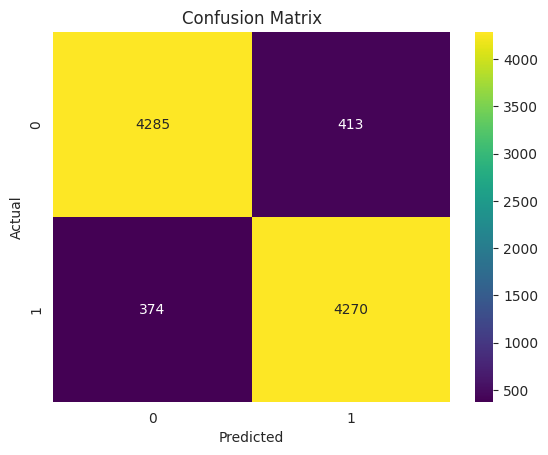

In [21]:
sns.set_style('darkgrid')

cm = confusion_matrix(y_test_res,y_logistic)
sns.heatmap(cm,annot = True,cmap = 'viridis',fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')
plt.show()

In [22]:
#using GridSearchCV improving performance
from sklearn.model_selection import GridSearchCV

params = {
    'C':[0.01,0.1,1,10,100]
}
grid = GridSearchCV(logistic,params,cv = 5,scoring = 'f1')
grid.fit(X_train_res,y_train_res)

print(grid.best_params_)

{'C': 10}


In [23]:
#now using this parameter
logistic = LogisticRegression(C = 10)

logistic.fit(X_train_res,y_train_res)

y_logist = logistic.predict(X_test_res)
print(classification_report(y_test_res,y_logist))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4698
           1       0.92      0.99      0.95      4644

    accuracy                           0.95      9342
   macro avg       0.95      0.95      0.95      9342
weighted avg       0.95      0.95      0.95      9342



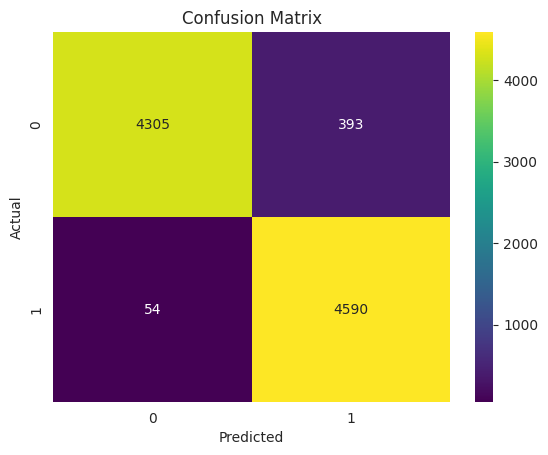

In [24]:
cm = confusion_matrix(y_test_res,y_logist)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'viridis')


plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')
plt.show()

In [25]:
#trying SVM now
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear',C = 1,probability = True)
svm_model.fit(X_train_res,y_train_res)

y_pred_svm = svm_model.predict(X_test_res)
print(classification_report(y_test_res,y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4698
           1       0.90      0.98      0.94      4644

    accuracy                           0.94      9342
   macro avg       0.94      0.94      0.94      9342
weighted avg       0.94      0.94      0.94      9342



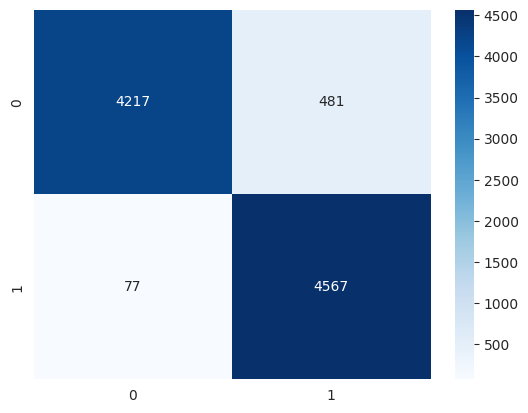

In [26]:
sns.heatmap(confusion_matrix(y_test_res,y_pred_svm),annot = True,cmap = 'Blues',fmt= 'd')
plt.show()

In [ ]:
#tuning the parameter of SVM
params = {
    'C' : [0.1,1,10]
}
grid= GridSearchCV(svm_model,params,cv = 2,scoring = 'f1')
grid.fit(X_train_res,y_train_res)

print(grid.best_params_)   #gives C as 1 which was already set as such

{'C': 1}


In [27]:
#trying naive bayes for binary classification
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train_res.toarray(),y_train_res)

y_pred_gaussian = gaussian.predict(X_test_res.toarray())
print(classification_report(y_test_res,y_pred_gaussian))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84      4698
           1       0.78      1.00      0.88      4644

    accuracy                           0.86      9342
   macro avg       0.89      0.86      0.86      9342
weighted avg       0.89      0.86      0.86      9342



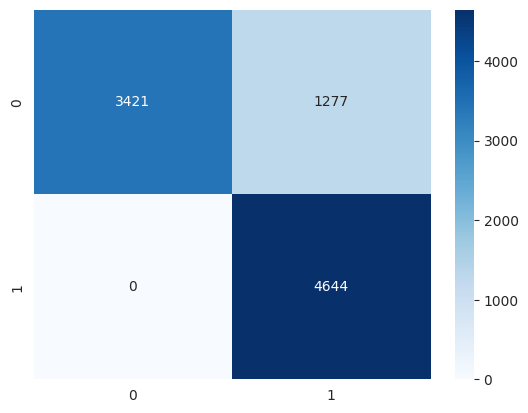

In [28]:
cm_naive = confusion_matrix(y_test_res,y_pred_gaussian)
sns.heatmap(cm_naive,annot = True,cmap = 'Blues',fmt = 'd')
plt.show()

Deep Learning Model

In [29]:
#trying deep learning algorithm
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC

In [30]:
#tokenizing for deep learning
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(data['Label'])

X = tokenizer.texts_to_sequences(data['Label'])

y = data['Class']

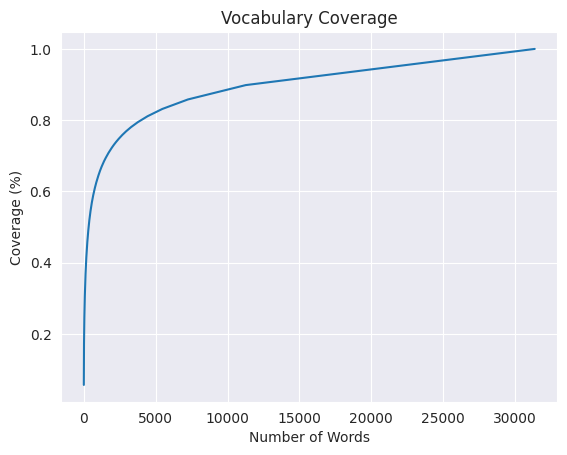

In [33]:
#plotting vocabulary coverage to set input_dim (90%-95% of vocab words)
import numpy as np

word_counts = tokenizer.word_counts  # Dictionary of word frequencies
sorted_counts = sorted(word_counts.values(), reverse=True)
cumulative_counts = np.cumsum(sorted_counts) / sum(sorted_counts)  # Normalizing

import matplotlib.pyplot as plt

plt.plot(range(1, len(sorted_counts) + 1), cumulative_counts)
plt.xlabel("Number of Words")
plt.ylabel("Coverage (%)")
plt.title("Vocabulary Coverage")
plt.show()

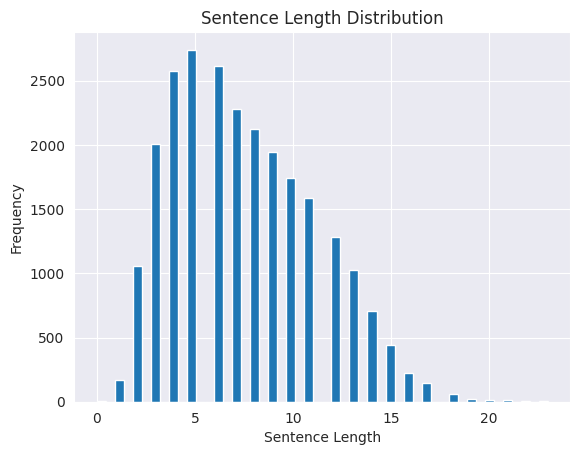

In [31]:
#plotting sentence distribution to set maxlen
import matplotlib.pyplot as plt

sentence_lengths = [len(seq) for seq in X]  # X is tokenized sequences

plt.hist(sentence_lengths, bins=50)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Sentence Length Distribution")
plt.show()

In [32]:
#observing graph we see sentence length is pretty low thus maxlen is also set low
X = pad_sequences(X,maxlen = 20)

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 30)

In [35]:
#class_weight added to make learning better for imbalanced data
class_weights = compute_class_weight(class_weight = 'balanced',classes = np.unique(y_train)
                  , y = y_train)

class_weights = dict(enumerate(class_weights))

model = Sequential([
    Embedding(input_dim = 20000,output_dim = 256,input_length = X_train.shape[1]),
    LSTM(128,return_sequences = True,recurrent_dropout = 0.3),
    LSTM(64,return_sequences = True,recurrent_dropout = 0.3),
    LSTM(32),Dropout(0.5),
    Dense(1,activation = 'sigmoid')
])
#BinaryCrossentropy(from_logits = True) ensures better performance for imbalanced data

model.compile(optimizer = 'adam',loss = BinaryCrossentropy(from_logits = True),metrics = ['accuracy',AUC(name = 'auc')])

model.fit(X_train,y_train,epochs = 5,batch_size = 32,
          validation_data = (X_test,y_test),class_weight = class_weights)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


581/581 ━━━━━━━━━━━━━━━━━━━━ 79s 123ms/step - accuracy: 0.6261 - auc: 0.6402 - loss: 0.6680 - val_accuracy: 0.8475 - val_auc: 0.8711 - val_loss: 0.3730
Epoch 2/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 71s 123ms/step - accuracy: 0.8618 - auc: 0.9172 - loss: 0.3580 - val_accuracy: 0.8583 - val_auc: 0.8609 - val_loss: 0.3275
Epoch 3/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 78s 116ms/step - accuracy: 0.9170 - auc: 0.9678 - loss: 0.2162 - val_accuracy: 0.8701 - val_auc: 0.8388 - val_loss: 0.3079
Epoch 4/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9552 - auc: 0.9898 - loss: 0.1148 - val_accuracy: 0.8502 - val_auc: 0.8122 - val_loss: 0.4202
Epoch 5/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 67s 116ms/step - accuracy: 0.9722 - auc: 0.9936 - loss: 0.0761 - val_accuracy: 0.8773 - val_auc: 0.7773 - val_loss: 0.3882


194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step


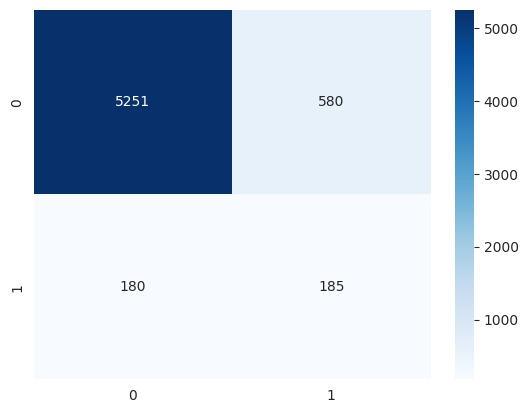

In [38]:
y_predict_model = model.predict(X_test)
y_predict_model = (y_predict_model > 0.5).astype(int
                                              )

cm_bi = confusion_matrix(y_test,y_predict_model)
sns.heatmap(cm_bi,annot = True,fmt = 'd',cmap = 'Blues')
plt.show()

In [37]:
#trying bi-directional to get better context
from tensorflow.keras.layers import Bidirectional

model_bi = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=X_train.shape[1]),
    Bidirectional(LSTM(64, return_sequences=True, recurrent_dropout=0.3)),
    Dropout(0.4),
    Bidirectional(LSTM(32, recurrent_dropout=0.3)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
model_bi.compile(optimizer = 'adam',loss = BinaryCrossentropy(from_logits = True),metrics = ['accuracy', AUC(name = 'auc')])

model_bi.fit(X_train,y_train,epochs = 5,batch_size = 32,
          validation_data = (X_test,y_test),class_weight = class_weights)

Epoch 1/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 71s 92ms/step - accuracy: 0.6925 - auc: 0.6907 - loss: 0.6221 - val_accuracy: 0.8160 - val_auc: 0.8722 - val_loss: 0.4572
Epoch 2/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 48s 83ms/step - accuracy: 0.8898 - auc: 0.9275 - loss: 0.3277 - val_accuracy: 0.8502 - val_auc: 0.8533 - val_loss: 0.3583
Epoch 3/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.9310 - auc: 0.9734 - loss: 0.1935 - val_accuracy: 0.8583 - val_auc: 0.8262 - val_loss: 0.3578
Epoch 4/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.9544 - auc: 0.9894 - loss: 0.1204 - val_accuracy: 0.8815 - val_auc: 0.8027 - val_loss: 0.3096
Epoch 5/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.9702 - auc: 0.9940 - loss: 0.0837 - val_accuracy: 0.8830 - val_auc: 0.7712 - val_loss: 0.3754


194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


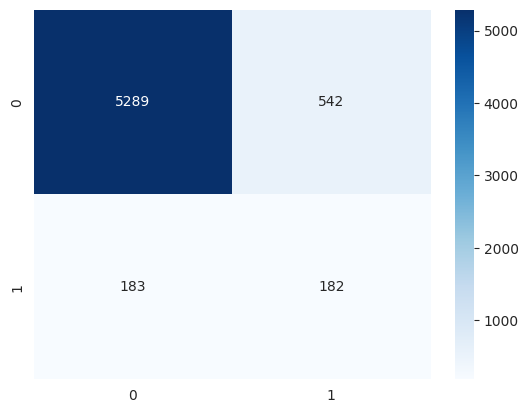

In [40]:
y_predict_bi = model_bi.predict(X_test)
y_predict_bi = (y_predict_bi > 0.5).astype(int)

cm_bi = confusion_matrix(y_test,y_predict_bi)
sns.heatmap(cm_bi,annot = True,fmt = 'd',cmap = 'Blues')
plt.show()

194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


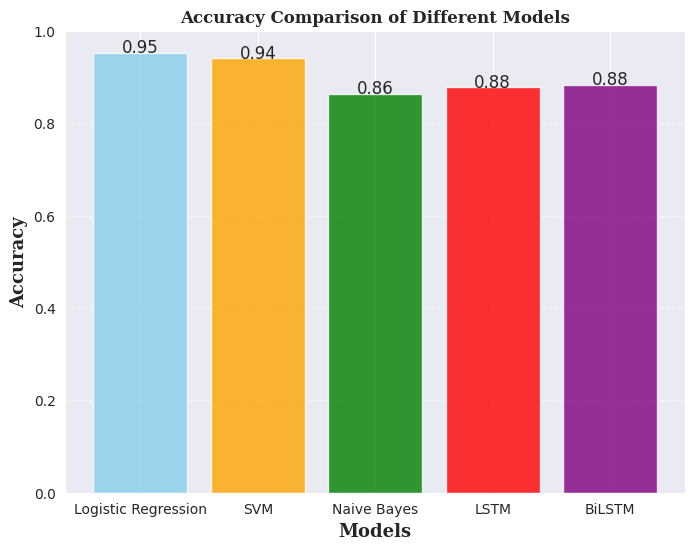

In [46]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Get predictions
logistic_preds = logistic.predict(X_test_res)
svm_preds = svm_model.predict(X_test_res)
naive_preds = gaussian.predict(X_test_res.toarray())

# LSTM & BiLSTM predictions (convert probabilities to 0/1)
lstm_preds = (model.predict(X_test) > 0.5).astype(int)
bilstm_preds = (model_bi.predict(X_test) > 0.5).astype(int)

# Compute accuracy scores
logistic_acc = accuracy_score(y_test_res, logistic_preds)
svm_acc = accuracy_score(y_test_res, svm_preds)
naive_acc = accuracy_score(y_test_res, naive_preds)
lstm_acc = accuracy_score(y_test, lstm_preds)
bilstm_acc = accuracy_score(y_test, bilstm_preds)

# Models and their accuracies
models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'LSTM', 'BiLSTM']
accuracies = [logistic_acc, svm_acc, naive_acc, lstm_acc, bilstm_acc]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green', 'red', 'purple'],alpha = 0.8)
plt.xlabel("Models",fontweight = 'bold',fontsize = 13,family = 'serif')
plt.ylabel("Accuracy",fontweight = 'bold',fontsize = 13,family = 'serif')
plt.title("Accuracy Comparison of Different Models",family = 'serif',fontweight = 'bold')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(accuracies):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)

plt.show()


194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


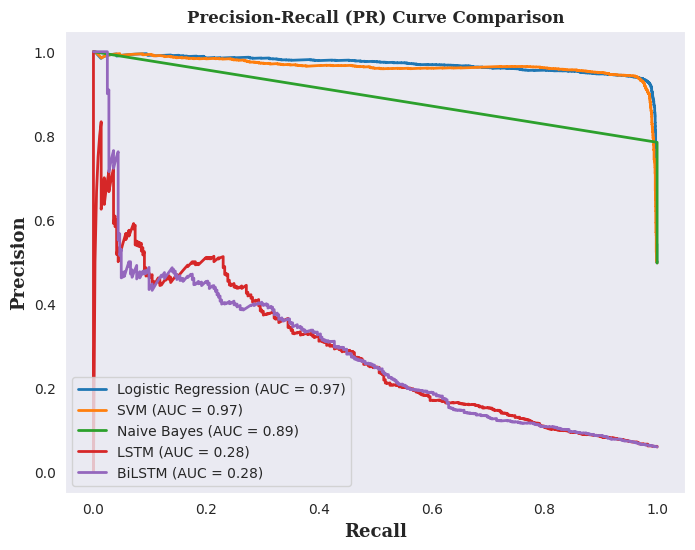

In [47]:
from sklearn.metrics import precision_recall_curve, auc

# Compute Precision-Recall for each model
precision_lr, recall_lr, _ = precision_recall_curve(y_test_res, logistic.predict_proba(X_test_res)[:,1])
pr_auc_lr = auc(recall_lr, precision_lr)

precision_svm, recall_svm, _ = precision_recall_curve(y_test_res, svm_model.predict_proba(X_test_res)[:,1])
pr_auc_svm = auc(recall_svm, precision_svm)

precision_naive,recall_naive, _ = precision_recall_curve(y_test_res,gaussian.predict_proba(X_test_res.toarray())[:,1])
pr_auc_naive = auc(recall_naive,precision_naive)

precision_lstm, recall_lstm, _ = precision_recall_curve(y_test,model.predict(X_test).ravel())
pr_auc_lstm = auc(recall_lstm, precision_lstm)

precision_bi, recall_bi, _ = precision_recall_curve(y_test,model_bi.predict(X_test).ravel())
pr_auc_bi = auc(recall_bi, precision_bi)

# Plot PR Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f"Logistic Regression (AUC = {pr_auc_lr:.2f})", lw=2)
plt.plot(recall_svm, precision_svm, label=f"SVM (AUC = {pr_auc_svm:.2f})", lw=2)
plt.plot(recall_naive, precision_naive, label=f"Naive Bayes (AUC = {pr_auc_naive:.2f})", lw=2)
plt.plot(recall_lstm, precision_lstm, label=f"LSTM (AUC = {pr_auc_lstm:.2f})", lw=2)
plt.plot(recall_bi, precision_bi, label=f"BiLSTM (AUC = {pr_auc_bi:.2f})", lw=2)

# Formatting
plt.xlabel("Recall",fontweight = 'bold',fontsize = 13,family = 'serif')
plt.ylabel("Precision",fontweight = 'bold',fontsize = 13,family = 'serif')
plt.title("Precision-Recall (PR) Curve Comparison",family = 'serif',fontweight = 'bold')
plt.legend(loc="lower left")
plt.grid()
plt.show()


**Conclusion & Future Work**

In this project, we explored Hate Speech detection using both traditional machine learning models (**Logistic Regression, SVM, Naive Bayes**) and deep learning models (**LSTM, Bidirectional LSTM**). After extensive evaluation, we found that:

Logistic Regression, SVM, and Naive Bayes outperformed deep learning models in terms of accuracy and overall performance.

LSTM-based models did not generalize well to the dataset, likely due to limited data size and the need for more advanced tuning.Tuning hyperparameters would probably yeild better results for LSTM.

Precision-Recall analysis indicated that traditional ML models were better suited for this task.

While deep learning models did not yield the best results, their inclusion is to highlight the importance of exploring different approaches before selecting an optimal model.